In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize,RegexpTokenizer
from nltk.stem import PorterStemmer,LancasterStemmer

from collections import Counter

In [157]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Exploration

In [3]:
data=pd.read_excel('Input/Canva_reviews.xlsx')

In [4]:
data.shape

(1500, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1500 non-null   object        
 1   userName              1500 non-null   object        
 2   userImage             1500 non-null   object        
 3   review                1500 non-null   object        
 4   score                 1500 non-null   int64         
 5   thumbsUpCount         1500 non-null   int64         
 6   reviewCreatedVersion  1500 non-null   object        
 7   at                    1500 non-null   datetime64[ns]
 8   replyContent          523 non-null    object        
 9   repliedAt             523 non-null    datetime64[ns]
 10  Sentiment             1500 non-null   object        
 11  Sub Category          1499 non-null   object        
 12  Sub Category_test     23 non-null     object        
dtypes: datetime64[ns](

In [20]:
data.head(2)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN


In [7]:
data.loc[13,'review']

'Unable to save my work. Nothing works :('

In [9]:
data.loc[13,'Sentiment']

'Negative'

In [11]:
data.loc[1499,'review']

'I am a teacher and this was so much for this school year! Love this.'

In [12]:
data.loc[1499,'Sentiment']

'Positive'

# Bar Plot of 'Sentiment'

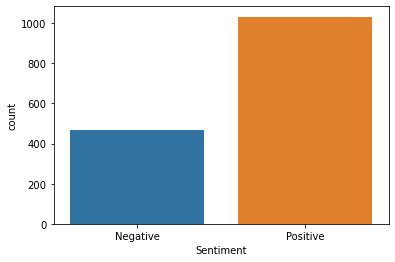

In [15]:
sns.countplot(x="Sentiment",data=data)
plt.show()

In [16]:
data['Sentiment'].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

In [17]:
468/(1032+468)

0.312

# Bar Plot of 'score'

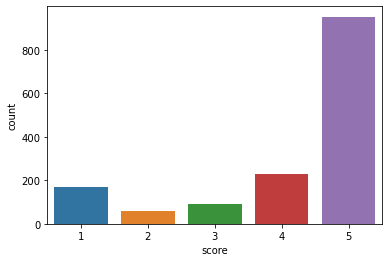

In [19]:
sns.countplot(x="score",data=data)
plt.show()

# Check relationship between score and sentiment

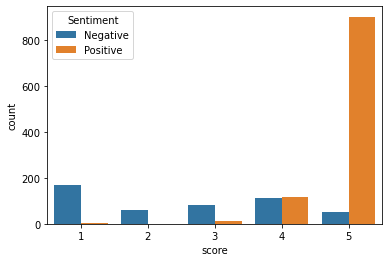

In [21]:
sns.countplot(x='score',data=data,hue='Sentiment')
plt.show()

# Find the length of review

In [25]:
data['len']=data['review'].apply(len)

In [26]:
data['len'].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: len, dtype: float64

# Plot histogram for length column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


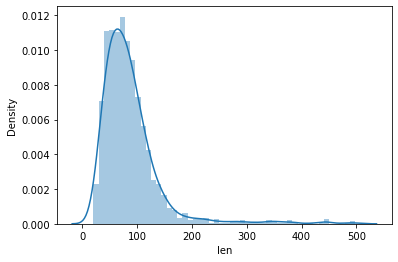

In [30]:
sns.distplot(data['len'])
plt.show()

# plot the distribution with sentiment

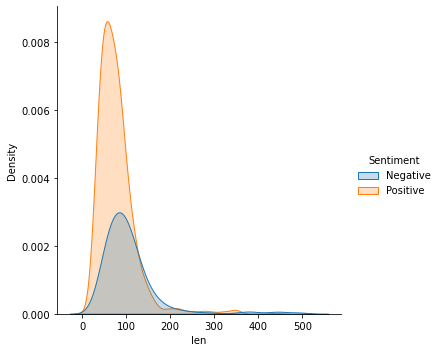

In [31]:
sns.displot(data=data,x='len',hue='Sentiment',fill=True,kind='kde')
plt.show()

In [32]:
# NLTK download

In [33]:
pip install nltk

In [35]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Tokenization

In [37]:
data=data[['review','Sentiment']]

In [38]:
data.loc[13,'review']

'Unable to save my work. Nothing works :('

In [41]:
sent_tokenize(data.loc[13,'review'])

['Unable to save my work.', 'Nothing works :(']

In [43]:
data.loc[1495,'review']

'Absolutely amazing and a lifesaver for teachers.'

In [44]:
word_tokenize(data.loc[13,'review'])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [45]:
word_tokenize(data.loc[1496,'review'])

['Very',
 'nice',
 'but',
 'many',
 'a',
 'times',
 'shows',
 'error',
 'opening',
 'the',
 'ppt',
 '.',
 'This',
 'was',
 'my',
 'school',
 'project',
 'and',
 'now',
 'has',
 'disturbed',
 'me',
 '.']

# Convert text to lower case

In [47]:
reviews=list(data['review'])

In [48]:
len(reviews)

1500

In [50]:
reviews_lower=[r.lower() for r in reviews]

In [52]:
tokens=[word_tokenize(r) for r in reviews_lower]

In [56]:
tokens[13][0]

'unable'

In [57]:
len(tokens)

1500

# Stopwords Removal

In [59]:
#remove common words

sw=stopwords.words('english')

In [64]:
tokens= [[ word for word in t if word not in sw] for t in tokens]

In [66]:
tokens[1496]

['nice',
 'many',
 'times',
 'shows',
 'error',
 'opening',
 'ppt',
 '.',
 'school',
 'project',
 'disturbed',
 '.']

## Remove punctuations

In [68]:
tokenizer=RegexpTokenizer(r'\w+')

In [69]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [72]:
tokens=[["".join(tokenizer.tokenize(word)) for word in t if len(tokenizer.tokenize(word))>0] for t in tokens]

In [73]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

# Stemming

In [78]:
#getting all the root words

porter =PorterStemmer()
lancaster = LancasterStemmer()

In [79]:
porter.stem("teachers")

'teacher'

In [81]:
tokens=[[porter.stem(word) for word in t] for t in tokens]

In [83]:
tokens[1496]

['nice',
 'mani',
 'time',
 'show',
 'error',
 'open',
 'ppt',
 'school',
 'project',
 'disturb']

# Word count Distribution

In [86]:
flat_tokens=[word for t in tokens for word in t]

In [88]:
len(flat_tokens)

13782

In [89]:
flat_tokens[:10]

['overal', 's', 'realli', 'amaz', 'app', 've', 'use', 'past', '5', 'year']

In [93]:
counts=Counter(flat_tokens)

In [95]:
len(counts)

1720

In [96]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]

# Bag of Words

In [102]:
clean_reviews=[" ".join(t) for t in tokens]

In [104]:
len(clean_reviews)

1500

In [108]:
clean_reviews

['overal s realli amaz app ve use past 5 year howev one issu though want get address sinc think issu last mani year text blur zoom s pixel thought issu occur mobil app howev also present websit pleas fix still rememb time export high definit text love experi thank',
 'hey ye gave 5 star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank',
 'canva use good app recent ve face issu save file want file save png format get save jpg format moreov want file save get stuck download screen call magic happen ll get 1 star hope fix app soon thank',
 's brilliant app one problem m edit post doubl tap photo reposit start zoom photo 8 time 10 app crash restart lg g5 se sometim ve go desktop version pc reposit zoom photo want resum edit back mobil',
 'great app use make bt meme recent updat m abl chang font style edit o

In [112]:
vect=CountVectorizer(binary=True,min_df=5)

In [113]:
X=vect.fit_transform(clean_reviews)

In [115]:
X.shape

(1500, 413)

# Unique words in the vocabulary

In [118]:
len(vect.vocabulary_)

413

# Convert the Sparse Matrix to array

In [119]:
type(X)

scipy.sparse.csr.csr_matrix

In [120]:
X_a =X.toarray()

In [122]:
X_a.shape

(1500, 413)

In [125]:
X_a[13,:].sum()

4

In [126]:
clean_reviews[13]

'unabl save work noth work'

In [128]:
vect.get_feature_names().index('unabl')

370

In [129]:
X_a[13,370]

1

In [130]:
vect.get_feature_names().index('work')

401

In [132]:
X_a[13,401]

1

In [133]:
data.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative
3,"It's a brilliant app, but I have just one prob...",Negative
4,This was such a great app. I used to make BTS ...,Negative


In [135]:
data['Output']=data['Sentiment'].apply(lambda x: 1 if x=='Positive' else 0)

In [136]:
data.head()

,review,Sentiment,Output
0,Overall it's really an amazing app. I've been ...,Negative,0
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive,1
2,Canva used to be a good app! But recently I've...,Negative,0
3,"It's a brilliant app, but I have just one prob...",Negative,0
4,This was such a great app. I used to make BTS ...,Negative,0


In [139]:
y=data.iloc[:,-1]

# Split the data into train and test

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Build a Logistic Regression Model

In [149]:
model=LogisticRegression()

In [150]:
model.fit(X_train,y_train)

LogisticRegression()

In [160]:
train_predict=model.predict(X_train)

In [161]:
accuracy_score(y_train,train_predict)

0.9608333333333333

In [162]:
test_pred=model.predict(X_test)
accuracy_score(y_test,test_pred)

0.9133333333333333

# Save both the vectorize and model

In [168]:
with open('Output/binary_count_vect.pkl','wb') as f:
    pickle.dump(vect,f)



In [169]:
with open('Output/binary_count_vect_lr.pkl','wb') as f:
    pickle.dump(model,f)

# bag of Words without Binary

In [171]:
vect=CountVectorizer(min_df=5)

In [172]:
X=vect.fit_transform(clean_reviews)

In [173]:
clean_reviews[13]

'unabl save work noth work'

In [174]:
X_a=X.toarray()

In [176]:
X_a[13].sum()

5

In [177]:
vect.get_feature_names().index('work')

401

In [181]:
X_a[13,401]

2

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [184]:
model=LogisticRegression()

In [185]:
model.fit(X_train,y_train)

LogisticRegression()

In [186]:
train_predict=model.predict(X_train)